#CEFET/RJ

**PPCIC - Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

---

**Ensemble Learning: combinação de métodos**

**Disciplina**: Aprendizado de Máquina

**Professor**: Eduardo Bezerra

**Aluno**: Janio de Souza Lima

#1 Métodos ensemble

Ensemble learning está relacionado com a combinação de diferentes métodos de aprendizado para melhorar sua capacidade em relação aos resultados obtidos individualmente.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

##1.1 Classificadores de votação

In [4]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

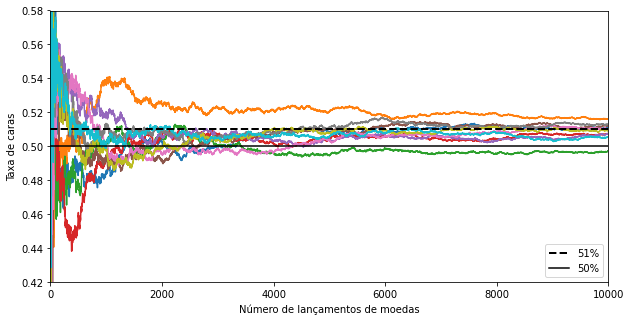

In [8]:
plt.figure(figsize=(10,5))

plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")

plt.xlabel('Número de lançamentos de moedas')
plt.ylabel('Taxa de caras')
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])

plt.savefig('plot1.1.png')

Criação de um classificador ensemble

In [9]:
#Carga do conjunto de dados
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Primeiramente são gerados modelos usando *Regressão Logística*, *Florestas Aleatórias* e *SVM*. Em seguida é gerado o classificador de votação a partir da conjunção dos três métodos.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [11]:
#Treinamento do modelo
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

Uso do classificador ensemble para predizer e calcular a acurácia da predição. Também são comparadas as acurácias dos métodos executados de maneira individual, demonstrando que o ensemble apresenta resultado superior.

In [12]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


##1.2 Bagging e Pasting

Esta abordagem visa usar o mesmo algoritmo e treiná-los diversas vezes com amostragens aleatórias do conjunto de treinamento.

* *Bagging (Bootstrap aggregating)*: Realizar a amostragem com substituição.
* *Pasting*: Realizar a amostragem sem substituição.

As previsões são realizadas agregando previsões de todos os previsores treinados.

In [13]:
#Criação do modelo
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

Neste exemplo está sendo usado o método *bagging* (com substituição). Para usar pastig, basta alterar o parâmetro `bootstrap` para False.

---

A seguir é realizado o treinamento e a aplicação do modelo para predição.

In [15]:
#Treinamento
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [16]:
#Aplicação para predição
y_pred = bag_clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


Para comparação apresentamos na célula anterior o cálculo da acurácia do modelo ensemble e abaixo criamos, treinamos e aplicamos uma árvore de decisão e calculamos a sua acurácia. Como pode ser vista o ensemble apresenta acurácia de 90,4%, enquanto o modelo original apresenta 85,6%.

In [20]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


Visualização da fronteira de decisão para comparar uma árvore única e as 500 árvores treinadas pelo modelo *bagging*.

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

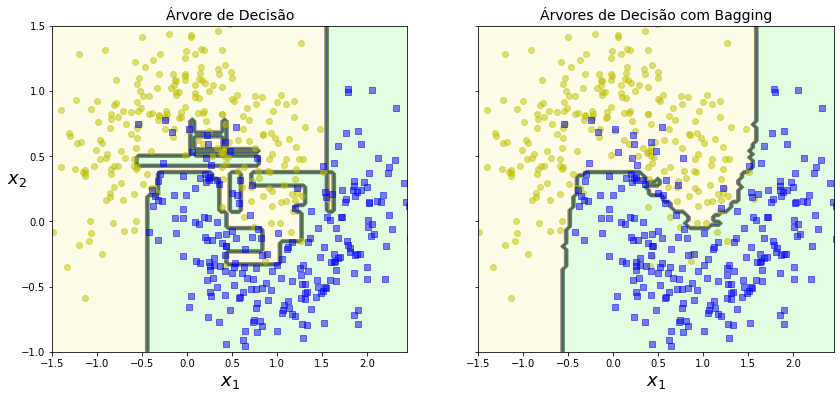

In [24]:
fix, axes = plt.subplots(ncols=2, figsize=(14,6), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title('Árvore de Decisão', fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title('Árvores de Decisão com Bagging', fontsize=14)

plt.ylabel("")

plt.savefig('plot1.2.png')

#Referências e links

**Referências**

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

---
Conteúdos adicionais e explicações detalhadas do algoritmo em:

https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb